# Binary image classifier of ladybugs and mimicking spiders using two layered fully connected NN with TensorFlow API
#Nathan Jones

In [1]:
import numpy as np
import tensorflow as tf
import time
import cv2
import glob
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Nathan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


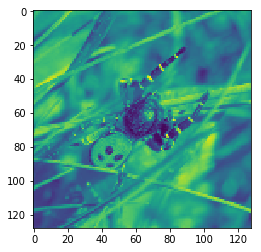

In [2]:
nH0 = 128 #images rescaled to nH0*nH0 pixels
crossNum = '04'

Ylabels = []
Xdata = []
files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/EresusGenusTrain/*.JPG")
for myFile in files:
    img = cv2.imread(myFile, 0)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append(1.0)

files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/CoccinellaGenusTrain/*.JPG")
for myFile in files:
    img = cv2.imread(myFile, 0)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append(0.0)    

trainSetXOrig = np.array(Xdata)
trainSetYOrig = np.array(Ylabels)

trainSetX = trainSetXOrig.reshape(trainSetXOrig.shape[0], -1).T # changing each image in the feature set to flatten pixle colour and rows into a column then transpose into a flat row
trainSetY = trainSetYOrig.reshape((1, trainSetYOrig.shape[0])) # change the labels shape from a rank 1 array to a column vector

trainSetX = trainSetX/255 # standardizing


plt.imshow(Xdata[2])
plt.show()

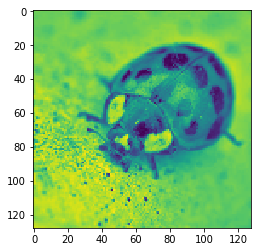

In [3]:

Ylabels = []
Xdata = []
files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/EresusGenusTest/*.JPG")
for myFile in files:
    img = cv2.imread(myFile, 0)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append(1.0)

files = glob.glob ("C:/Users/Nathan/GoogleDrive/Honours/Cosc428/Project/DataModified/cross"+crossNum+"/CoccinellaGenusTest/*.JPG")
for myFile in files:
    img = cv2.imread(myFile, 0)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
    resizedImage = cv2.resize(img, (nH0, nH0))
    Xdata.append(resizedImage)
    Ylabels.append(0.0)    

testSetXOrig = np.array(Xdata)
testSetYOrig = np.array(Ylabels)

testSetX = testSetXOrig.reshape(testSetXOrig.shape[0], -1).T # changing each image in the feature set to flatten pixle colour and rows into a column then transpose into a flat row
testSetY = testSetYOrig.reshape((1, testSetYOrig.shape[0])) # change the labels shape from a rank 1 array to a column vector

testSetX = testSetX/255 # standardizing


plt.imshow(Xdata[30])
plt.show()

In [4]:
tf.reset_default_graph() # setting up the computational graph
tf.set_random_seed(1)

X = tf.placeholder(tf.float32, shape=(trainSetX.shape[0], None))
Y = tf.placeholder(tf.float32, shape=(trainSetY.shape[0], None))

W1 = tf.Variable(tf.random_normal([128, nH0*nH0], stddev=0.1), name="W1")
b1 = tf.Variable(tf.zeros([128, 1]), name="b1")

W2 = tf.Variable(tf.random_normal([1, 128], stddev=0.1), name="W2")
b2 = tf.Variable(tf.zeros([1, 1]), name="b2")

Z1 = tf.add(tf.matmul(W1, X), b1) 
A1 = tf.nn.sigmoid(Z1)
Z2 = tf.add(tf.matmul(W2, A1), b2)


logits = tf.transpose(Z2)
labels = tf.transpose(Y)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.03).minimize(cost)

In [5]:

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)
print(sess.run(cost, {X:trainSetX, Y:trainSetY}))
ti = time.time()
for i in range(1000):
    sess.run(optimizer, {X:trainSetX, Y:trainSetY})  # iterating cost function
    if i%100==0:
        print(sess.run(cost, {X:trainSetX, Y:trainSetY}))
        
print(sess.run(cost, {X:trainSetX, Y:trainSetY}))
tf = time.time()
print("run time = ", tf-ti)
nW1 = sess.run(W1)
nb1 = sess.run(b1)
nW2 = sess.run(W2)
nb2 = sess.run(b2)
sess.close()

0.72281575
0.7163281
0.45592433
0.32097766
0.22854805
0.1652168
0.12170251
0.09180971
0.07125479
0.05695962
0.04670907
0.03917642
run time =  38.28866243362427


In [6]:
# predict

nZ1 = np.dot(nW1, trainSetX)+nb1
nA1 = 1/(1+np.exp(-nZ1))
nZ2 = np.dot(nW2, nA1)+nb2
nA2 = 1/(1+np.exp(-nZ2))
for i in range(nA2.shape[1]):
    Y_prediction = np.round(nA2)

isCorrect = Y_prediction - trainSetY   
    
print("train accuracy: {} %".format(100 - np.mean(np.abs(isCorrect)) * 100))

correctEresus = 0
falsePositiveEresus = 0
falseNegativeEresus = 0

correctCoccinella = 0
falsePositiveCoccinella = 0
falseNegativeCoccinella = 0

for i in range(64):
    if isCorrect[0, i] == 0:
        correctEresus += 1
    elif isCorrect[0, i] == 1:
        falsePositiveEresus +=1
    elif isCorrect[0, i] == -1:
        falseNegativeEresus +=1

print("number of Eresus correct = ", correctEresus)
print("number of Eresus false positive = ", falsePositiveEresus)
print("number of Eresus false negative = ", falseNegativeEresus)
        


for i in range(64, 128):
    if isCorrect[0, i] == 0:
        correctCoccinella += 1
    elif isCorrect[0, i] == 1:
        falsePositiveCoccinella +=1
    elif isCorrect[0, i] == -1:
        falseNegativeCoccinella +=1
print("number of Coccinella correct = ", correctCoccinella)
print("number of Coccinella false positive = ", falsePositiveCoccinella)
print("number of Coccinella false negative = ", falseNegativeCoccinella)  


train accuracy: 100.0 %
number of Eresus correct =  64
number of Eresus false positive =  0
number of Eresus false negative =  0
number of Coccinella correct =  64
number of Coccinella false positive =  0
number of Coccinella false negative =  0


In [7]:
nZ1 = np.dot(nW1, testSetX)+nb1
nA1 = 1/(1+np.exp(-nZ1))
nZ2 = np.dot(nW2, nA1)+nb2
nA2 = 1/(1+np.exp(-nZ2))
for i in range(nA2.shape[1]):
    Y_prediction = np.round(nA2)

isCorrect = Y_prediction - testSetY 

print("train accuracy: {} %".format(100 - np.mean(np.abs(isCorrect)) * 100))

correctEresus = 0
falsePositiveEresus = 0
falseNegativeEresus = 0

correctCoccinella = 0
falsePositiveCoccinella = 0
falseNegativeCoccinella = 0


for i in range(16):
    if isCorrect[0, i] == 0:
        correctEresus += 1
    elif isCorrect[0, i] == 1:
        falsePositiveEresus +=1
    elif isCorrect[0, i] == -1:
        falseNegativeEresus +=1

print("number of Eresus correct = ", correctEresus)
print("number of Eresus false positive = ", falsePositiveEresus)
print("number of Eresus false negative = ", falseNegativeEresus)
        


for i in range(16, 32):
    if isCorrect[0, i] == 0:
        correctCoccinella += 1
    elif isCorrect[0, i] == 1:
        falsePositiveCoccinella +=1
    elif isCorrect[0, i] == -1:
        falseNegativeCoccinella +=1
print("number of Coccinella correct = ", correctCoccinella)
print("number of Coccinella false positive = ", falsePositiveCoccinella)
print("number of Coccinella false negative = ", falseNegativeCoccinella) 

train accuracy: 68.75 %
number of Eresus correct =  10
number of Eresus false positive =  0
number of Eresus false negative =  6
number of Coccinella correct =  12
number of Coccinella false positive =  4
number of Coccinella false negative =  0
